<a href="https://colab.research.google.com/github/jang-jinyeol/Machine_Learning/blob/main/%EB%8B%A4%EC%A4%91%ED%81%B4%EB%9E%98%EC%8A%A4%EB%B6%84%EB%A5%98%EC%9A%A9%EC%84%A0%ED%98%95%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
LogisticRegression과 LinearSVC에 있는 multi_class 매개변수의 기본값이 일대다를 의미하는 "ovr"이다.
(로지스틱 회귀만 제외하고)많은 선형 분류 모델은 태생적으로 이진 분류만을 지원한다.(로지스틱 회귀는 소프트맥스 함수를 사용한 다중 클래스
 분류 알고리즘을 지원한다.)
즉 다중 클래스(multiclass)를 지원하지 않는다. 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다
one-vs.-rest 방법이다(one-vs.-all)이라고도 함. 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킨다.
결국 클래스의 수만큼 이진 분류 모델이 만들어진다. 예측을 할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는
분류기의 클래스를 예측값으로 선택한다.

클래스별 이진 분류기를 만들면 각 클래스가 계수 벡터(w)와 절편(b)을 하나씩 갖게 된다.
결국 분류 신뢰도를 나타내는 다음 공식의 결괏값이 가장 높은 클래스가 해당 데이터의 클래스 레이블로 할당된다.

세 개의 클래스를 가진 간단한 데이터셋에 일대다 방식을 적용해보겠다.
이 데이터셋은 2차원이며 각 클래스의 데이터는 정규분포를 따른다.


'''

In [2]:
!pip install mglearn
import mglearn

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


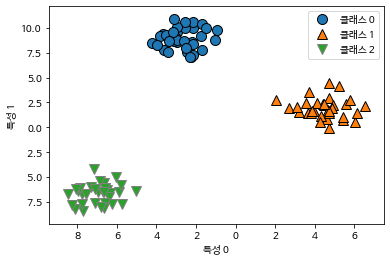

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0","클래스 1","클래스 2"])



In [ ]:
# 이 데이터셋으로 LinearSVC 분류기를 훈련해보겠다.
from sklearn.linear_model import LinearSVC
linear_svm =